## 0. Carga de librerias

In [14]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import log
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection

print("Current working directory:", os.getcwd())

Current working directory: c:\Users\VF6603\OneDrive - ENGIE\Escritorio\Codes\TFG


# 1. Modelo determinista
Vamos a implementar Lotka-Volterra para $N=4$ especies. Usaremos la expresión
$$
\frac{dx_i}{dt} = r_ix_i\left( 1- \sum_{j=1}^N a_{ij}x_j \right)
$$

In [15]:
# cargamos la función
from src.functions import system

## 1.1. Evolución temporal

In [16]:
# resolvemos con integración numérica
N=4
r = np.array(
    [1, 0.72, 1.53, 1.27]
)

a = np.array([
    [1, 1.09, 1.52, 0],
    [0, 1, 0.44, 1.36],
    [2.33, 0, 1, 0.47],
    [1.21, 0.51, 0.35, 1]
])

x0 = np.array([0.5, 0.5, 0.5, 0.5])
t_span = (0, 500) # con ~1e3 queda chulo
t_eval =np.linspace(t_span[0],t_span[1], 100000) 
sol = solve_ivp(system, t_span, x0, args=(r,a), t_eval = t_eval)
print(len(sol.y[0]))

100000


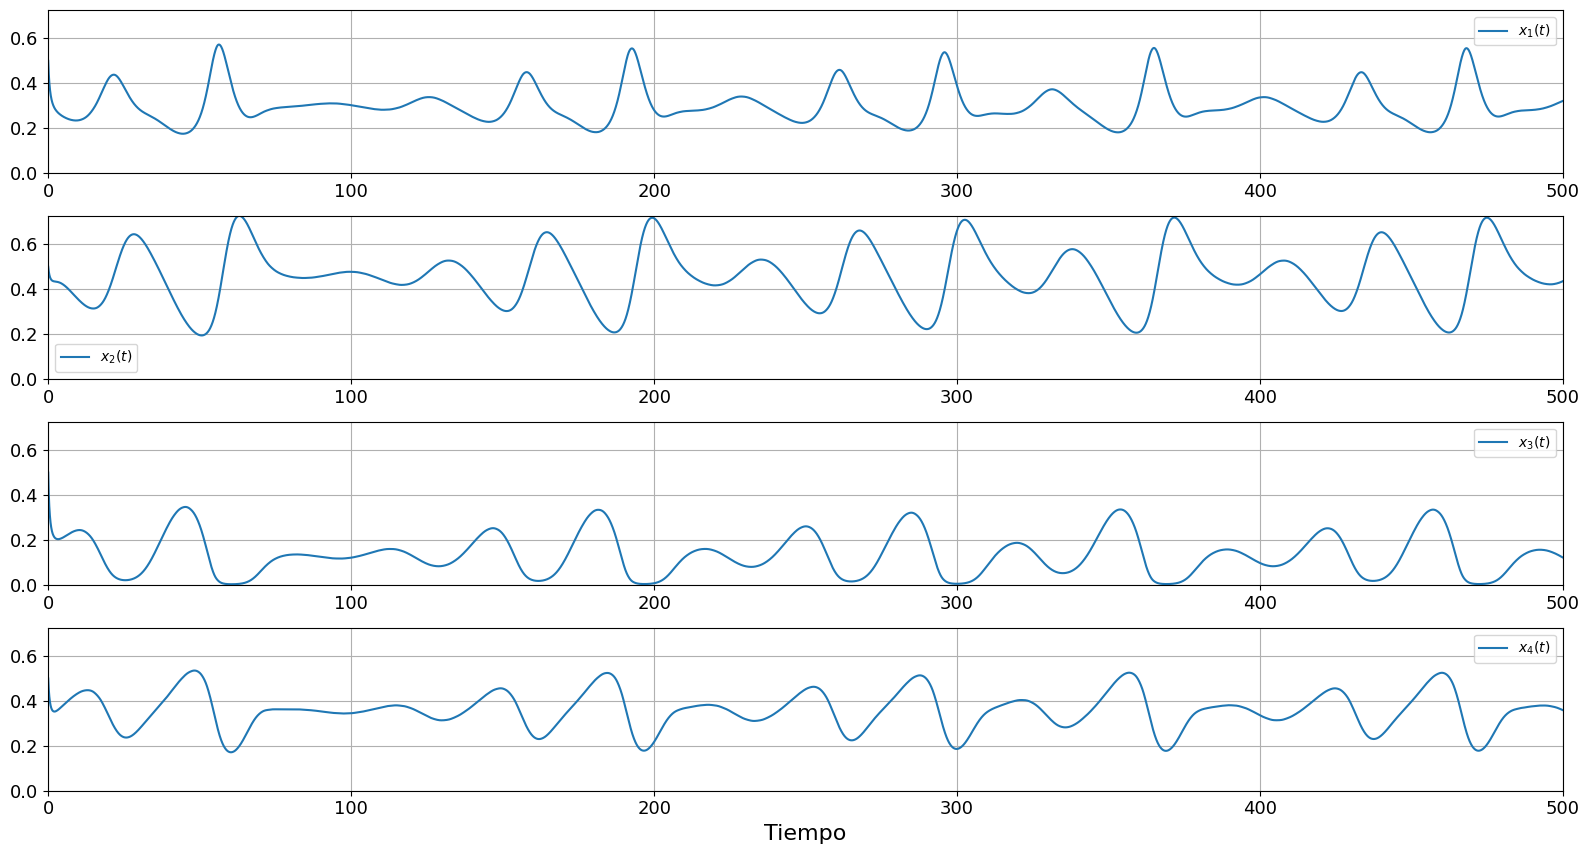

In [17]:
# %matplotlib notebook

# creamos la gráfica
fig, ax = plt.subplots(4, 1, figsize=(16,9))

ax[0].plot(sol.t, sol.y[0], label=f'$x_1(t)$')
ax[1].plot(sol.t, sol.y[1], label=f'$x_2(t)$')
ax[2].plot(sol.t, sol.y[2], label=f'$x_3(t)$')
ax[3].plot(sol.t, sol.y[3], label=f'$x_4(t)$')

# Configuración del tamaño de la fuente de los números en los ejes
plt.rc('xtick', labelsize=13)  
plt.rc('ytick', labelsize=13)

# ajustamos las etiquetas y el título
max_y = sol.y.max()
for i in range(4):
    # ax[i].set_ylabel('Población')
    ax[i].set_xlim(t_span[0], t_span[1])
    ax[i].set_ylim(0, max_y)
    ax[i].legend()
    ax[i].grid(True)

ax[3].set_xlabel('Tiempo', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 

# mostramos la grafica
plt.show()

# la guardamos
# fig.savefig('evol_temp_4especies.png', dpi=600)

In [18]:
# la guardamos
# fig.savefig('evol_temp_4especies.png', dpi=600)

## 1.2. Representación del espacio de fases

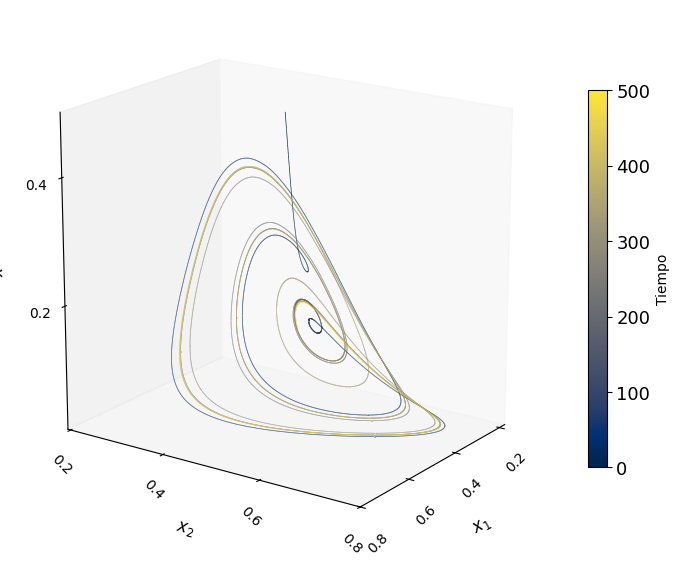

In [19]:
# %matplotlib notebook

# Creamos figura y ejes 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignamos color según la evolución temporal
time_sol = sol.t
c = t_span[-1] * (time_sol - time_sol.min()) / (time_sol.max() - time_sol.min())

# Creamos segmentos de línea
points = np.array([sol.y[0], sol.y[1], sol.y[2]]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Coloreamos los segmentos según 'c'
lc = Line3DCollection(segments, cmap='cividis', norm=plt.Normalize(np.min(c), np.max(c)))
lc.set_array(c)  # Define el gradiente según 'c'
lc.set_linewidth(0.5)  # Define el grosor de la línea
ax.add_collection3d(lc)

# Etiquetas de los ejes y título
ax.set_xlabel(r'$x_1$', fontsize=12, labelpad=10)
ax.set_ylabel(r'$x_2$', fontsize=12, labelpad=10)
ax.set_zlabel(r'$x_3$', fontsize=12, labelpad=10)
# ax.set_title('Espacio de fases', fontsize=14)

# Establecemos límites para que los ejes tengan proporciones iguales
xlim = [np.min(sol.y[0]), np.max(sol.y[0])]
ylim = [np.min(sol.y[1]), np.max(sol.y[1])]
zlim = [np.min(sol.y[2]), np.max(sol.y[2])]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_zlim(zlim)

# Ajustamos las marcas de los ejes
ax.set_xticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_zticks([0.2, 0.4])

# Ajustes para evitar solapamiento
ax.tick_params(axis='x', labelsize=10, rotation=45)  # Eje X
ax.tick_params(axis='y', labelsize=10, rotation=-45) # Eje Y
ax.tick_params(axis='z', labelsize=10)   

# Quitamos el grid
ax.grid(False)

# Añadimos la barra de color
cbar = plt.colorbar(lc, ax=ax, shrink=0.7)
cbar.set_label('Tiempo')

# Ajustamos proporciones de los ejes
ax.set_box_aspect([np.ptp(xlim), np.ptp(ylim), np.ptp(zlim)])  # Proporciones iguales

# Ajustamos la vista personalizada
ax.view_init(elev=18, azim=35)

# Guardamos la figura (opcional)
# fig.savefig('espacio_fasico_4especies.png', dpi=600)

plt.show()

In [20]:
# fig.savefig('espacio_fasico_4especies.png', dpi=600)

## 1.3. Cálculo de los exponentes de Lyapunov
Para este sistema tenemos el siguiente Jacobiano:
$$
J_{ik}=\frac{\partial \dot x_i}{\partial x_k} = r_i\left[\left( 1-\sum_{j=1}^Na_{ij}x_j \right)\delta_{ik} -x_ia_{ik} \right].
$$

In [21]:
from src.functions import jacobiano, sistema_dinamico, compute_LCEs

LCEs = compute_LCEs(x0, r, a, 100000)

print("Array de LCEs:", LCEs[0][-1])

Array de LCEs: [ 0.03032768 -1.04670266 -1.60995284 -1.74149904]


Finalmente hallamos los LCEs

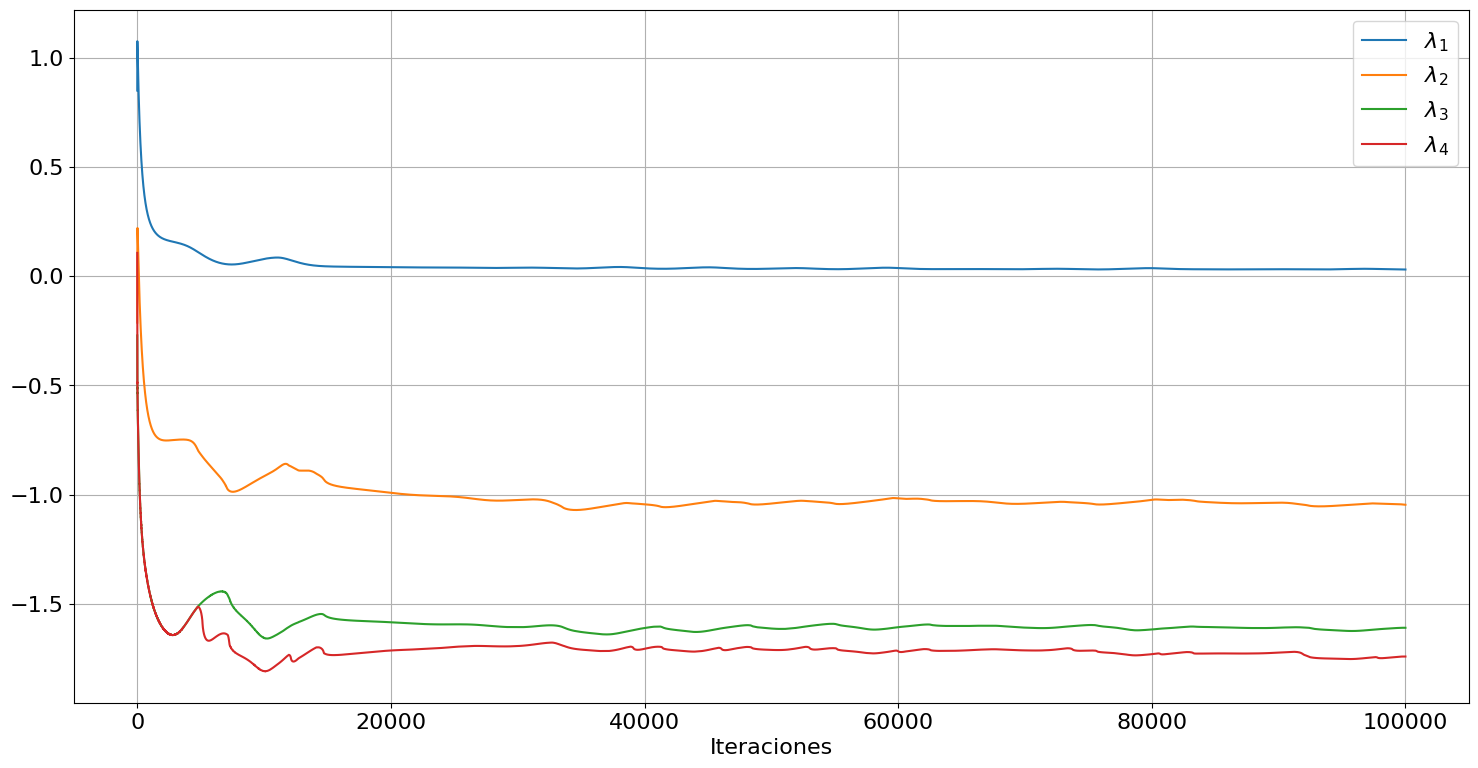

In [22]:
# Crear figura y ejes
fig_lces, ax_lces = plt.subplots(figsize=(18, 9))  

iters = np.arange(0, 100000, 1)
# Graficar los datos
plt.plot(iters, LCEs[0][:, 0], label=r'$\lambda_1$')
plt.plot(iters, LCEs[0][:, 1], label=r'$\lambda_2$')
plt.plot(iters, LCEs[0][:, 2], label=r'$\lambda_3$')
plt.plot(iters, LCEs[0][:, 3], label=r'$\lambda_4$')

# Personalizar los ejes
ax_lces.tick_params(axis='x', labelsize=16)
ax_lces.tick_params(axis='y', labelsize=16)

# Añadir leyenda, guardar y mostrar
plt.legend(fontsize=16)
plt.xlabel(r'Iteraciones', fontsize=16)
plt.grid()
# fig_lces.savefig('LCE_4especies.png', dpi=600)
plt.show()

In [23]:
# fig_lces.savefig('outputs/LCE_4especies.png', dpi=600)

Podemos hallar también su error estándar. Tendremos en cuenta solo la mitad final de los valores, que ya se puede considerar que han convergido. Primero, hallamos su desviación típica,

In [24]:
# solo tomamos la mitad final de los valores
n_mitad = len(LCEs[0][:, 0])//2
half_logs = LCEs[0][n_mitad:, :] 

# usamos la función de numpy
est = np.std(half_logs, axis = 0, ddof = 1) ## ddof = 1 porque es una muestra

print('Desviación estándar de los LCEs:', est)

Desviación estándar de los LCEs: [0.00199857 0.00837497 0.00743603 0.01361581]


## 1.4 Cálculo de la matriz de correlación

Necesitamos hallar los pares de coeficientes de correlación de Pearson (r). Para dos series temporales $x_1$, $x_2$, este coeficiente para una muestra es 
$$
r_{ij} = \frac{\text{Cov} (X_i,X_j)}{\sqrt{\text{Var}(X_i)\cdot\text{Var}(X_j)} }  
$$
donde 
$$
\text{Var}(X_i) = \frac{1}{n-1}\sum_{i=1}^n\left( x_i-\bar X \right)^2; \quad \text{Cov}(X, Y) = \frac1{n-1}\sum_{i=1}^n(x_i-\bar X)(y_i-\bar Y) 
$$

In [25]:
from src.functions import ccr

In [26]:
# hallamos la matriz de correlación

R_matrix= np.ones((4,4))

for i in range(4):
    for j in range(4):
        R_matrix[i,j] = ccr(sol.y[i], sol.y[j])

print('MATRIZ DE CORRELACIÓN')
print(R_matrix)

MATRIZ DE CORRELACIÓN
[[ 1.          0.11022686 -0.67251669 -0.57760347]
 [ 0.11022686  1.         -0.74976848 -0.86388293]
 [-0.67251669 -0.74976848  1.          0.92200335]
 [-0.57760347 -0.86388293  0.92200335  1.        ]]


## 1.5 Cálculo de la Correlación Total
Para la correlación total, necesitamos conocer la entropía (de información, Shannon) y la entropía conjunta. Se pueden calcular como
$$
H(X) := -\sum p(x)\log p(x);\quad H(X_1, X_2, X_3, X_4) = \sum_{x_1}\sum_{x_2}\sum_{x_3}\sum_{x_4} p(x_1, x_2, x_3, x_4)\log p(x_1, x_2, x_3, x_4).
$$

Con esto, la correlación total se calcula como
$$
TC(X_1, X_2, X_3, X_4) = \left( \sum_{i=1}^n H(X_i)\right) - H (X_1, X_2, X_3, X_4)
$$


In [27]:
# definimos una función para la entropía
## lo hallaremos haciendo histogramas

def entropy(x):
    # usamos la regla de sturges para el numero de bins optimo
    bins = int(np.log(len(x)) + 1)
    print('bins = ',bins)
    
    # hallamos el histograma
    counts, _ = np.histogram(x, bins=bins)
    
    # eliminamos bins vacíos para evitar log(0)
    counts = counts[counts>0]
    
    # normalizamos para que sea la distribución de probabilidad
    p = counts/np.sum(counts)
    
    # hallamos la entropía de shannon
    H = -np.sum(p*np.log(p))
    # plt.plot(x, p) #comentar el filtro para que funcione
    return H

In [28]:
# hallamos la entropía de cada serie
H1 = entropy(sol.y[0])
H2 = entropy(sol.y[1])
H3 = entropy(sol.y[2])
H4 = entropy(sol.y[3])

print(H1, H2, H3, H4)

bins =  12
bins =  12
bins =  12
bins =  12
2.088557442556071 2.3497427904834494 2.002294713178705 2.291063668727667


In [29]:
# para la entropía conjunta podemos hallar el histograma conjunto
def joint_entropy(x1, x2, x3, x4):
    bins = int(np.log(len(x1)) + 1)
    
    # creamos un solo array
    data = np.hstack((x1, x2, x3, x4))
    
    # hallamos el histograma multidimensional
    hist, _ = np.histogramdd(data, bins=bins)
    
    # aplanar y eliminar bins con 0s
    hist = hist.flatten() # para que sea un solo vector
    hist_nonzero = hist[hist>0]
    
    # hallamos la distribución de probabilidad
    p = hist_nonzero/np.sum(hist_nonzero)
    
    # hallamos entropía conjunta
    H = -np.sum(p*np.log(p))
    return H

In [30]:
# la calculamos
H_joint = joint_entropy(sol.y[0], sol.y[1], sol.y[2], sol.y[3])
print(H_joint)

2.2856967308008893


In [31]:
# hallamos la correlación total
TC = np.sum([H1, H2, H3, H4]) - H_joint

print('TC = ',TC)

TC =  6.445961884145001


En esencia, aunque cada población por separado tiene una cierta incertidumbre (o variabilidad), al combinarlas, se reduce drásticamente la incertidumbre total. Esto indica que las poblaciones no actúan de manera independiente, sino que comparten una gran parte de la información. En otras palabras, el estado o comportamiento de una población refleja en gran medida el de las otras, lo cual puede sugerir la presencia de factores comunes o interacciones fuertes entre ellas.

Esta fuerte dependencia implica que, a efectos de análisis o modelado, podría no ser necesario considerar cada población de forma aislada, ya que muchas de sus variaciones son redundantes.

## 1.6 Estudio de la correlación temporal
